In [19]:
!pip install -q kaggle
from google . colab import files
files . upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mhammadibrahim","key":"0babc8337473f18808e4c616bab89c32"}'}

In [20]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!kaggle datasets download -d nopdev/real-and-fake-news-dataset

 87% 10.0M/11.5M [00:00<00:00, 39.6MB/s]
100% 11.5M/11.5M [00:00<00:00, 45.7MB/s]


In [22]:
!unzip /content/real-and-fake-news-dataset.zip

Archive:  /content/real-and-fake-news-dataset.zip
  inflating: news.csv                


In [23]:
import pandas as pd

df = pd.read_csv("news.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [24]:
#check the distribution of labels 
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [26]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({'FAKE' : 0, 'REAL': 1})

#check the results with top 5 rows
df.head(5)

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


***Modelling without Pre-processing Text data***

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [29]:
#print the shapes of X_train and X_test

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5068,)
Shape of X_test:  (1267,)


**Attempt 1 : KNN**
***using euclidean distance*** 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors and euclidean distance      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       633
           1       0.75      0.58      0.66       634

    accuracy                           0.69      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.70      0.69      0.69      1267



**Attempt 2 : KNN**
***using cosine distance*** 

In [31]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors = 10, metric = 'cosine')))    #using the KNN classifier with 10 neighbors and cosine distance       
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       633
           1       0.75      0.73      0.74       634

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267



**Attempt 3 :RandomForest**

In [32]:
from sklearn.ensemble import RandomForestClassifier


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),   #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       633
           1       0.91      0.80      0.85       634

    accuracy                           0.86      1267
   macro avg       0.87      0.86      0.86      1267
weighted avg       0.87      0.86      0.86      1267



**Attempt 4 :Multinomial Naive Bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB(alpha = 0.75))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       633
           1       0.85      0.97      0.91       634

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.91      0.90      0.90      1267



In [34]:
X_test[:5]

2073    Written by Jacob G. Hornberger Thursday Octobe...
4326    You could shout yourself hoarse arguing what t...
1206    This post was originally published on this sit...
6213    Two of the country’s most powerful and politic...
3797    Ted Cruz raised nearly $20 million in the past...
Name: text, dtype: object

In [35]:
y_pred[:5]

array([0, 1, 0, 1, 1])

In [36]:
y_test[:5]

2073    0
4326    1
1206    0
6213    1
3797    1
Name: label_num, dtype: int64

**Use text pre-processing to remove stop words, punctuations and apply lemmatization**

In [38]:
#use this utility function to get the preprocessed text data
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [40]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
df['preprocessed_txt'] = df['text'].apply(preprocess) 

df.head()

,Unnamed: 0,title,text,label,label_num,preprocessed_txt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,U.S. Secretary State John F. Kerry say Monday ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Kaydee King @KaydeeKing November 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,primary day New York runner Hillary Clinton Do...


***Build a model with pre processed text***

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

**Attempt1 :RandomForest**
***using CountVectorizer with only trigrams***

In [42]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       633
           1       0.98      0.58      0.73       634

    accuracy                           0.78      1267
   macro avg       0.84      0.78      0.77      1267
weighted avg       0.84      0.78      0.77      1267



**Attempt1 :RandomForest**
***using CountVectorizer with 1-gram and bigrams***

In [43]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 2))),   #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       633
           1       0.89      0.88      0.89       634

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



Text(69.0, 0.5, 'Truth')

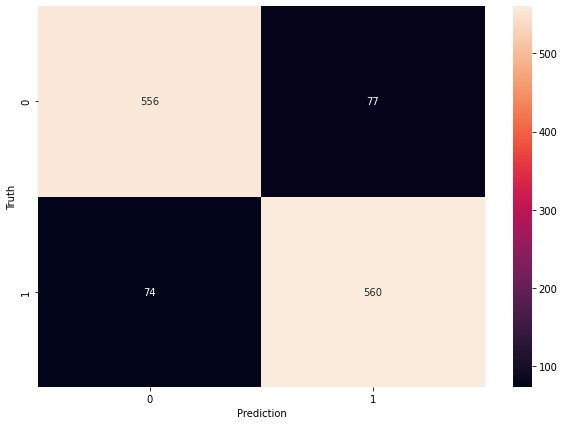

In [45]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Conclusion:**
As machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training.

In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words and we use sklearn CountVectorizer for this.

Without Pre-Processing Data

From the above in most of the cases, we can see that when we have the count vectorizer above trigrams or at trigrams, the performance keeps degrading. The major possible reason for this as the ngram_range keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.

For this reason, models like KNN failed terribly when performed with trigrams and using the euclidean distance. K-Nearest Neighbours(KNN) doesn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of the model. It performed well for class 1 and had terrible results for Class 0.

Both recall and F1 scores increase better when trained with the same KNN model but with cosine distance as cosine distance does not get influenced by the number of dimensions as it uses the angle better the two text vectors to calculate the similarity.

With respect to Naive and RandomForest models, both performed really well, and random forest with trigrams has a better edge on the recall metric.

As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories.

The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.

With Pre-Processing Data

Have trained the best model RandomForest on the pre-processed data, but RandomForest with trigrams fails to produce the same results here.

But the same randomForest with Unigram to Trigram features helps to produce very amazing results and is tops in the entire list with very good F1 scores and Recall scores.

Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.